In [6]:
import random
import time
from functools import reduce
class RadixSort:
    def __get_num_digits(self, A):
        m = 0
        for item in A:
            m = max(m, item)
        return len(str(m))

    def __flatten(self, A):
        return reduce(lambda x, y: x + y, A)

    def radix(self, A, num_digits):
        for digit in range(0, num_digits):
            B = [[] for i in range(10)] # Corrected list comprehension
            for item in A:
                num = item // 10 ** (digit) % 10
                B[num].append(item)
            A = self.__flatten(B) # Added self.
        return A

    def main(self,A): # Made main a method of the class
        # A = [12,42,542,23,345,2476,34435,9]
        num_digits = self.__get_num_digits(A) # Added self.
        A = self.radix(A, num_digits) # Added self.
        return A
random.seed(0)
random_list = [random.randint(1, 1000) for _ in range(100000)]
start = time.time()
sorter = RadixSort() # Create an instance of the class
sorter.main(random_list) # Call the main method on the instance
end = time.time()
print(end - start)

0.08995461463928223


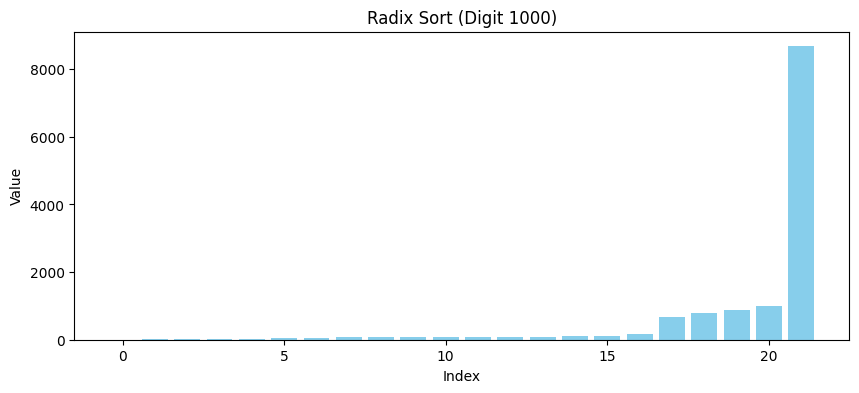

Sorted array: [170, 45, 75, 90, 802, 24, 2, 66, 90, 45, 7, 24, 78, 876, 8674, 87, 90, 8, 97, 986, 676, 98]


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

class RadixSortVisualized:
    def __get_num_digits(self, arr):
        m = 0
        for item in arr:
            m = max(m, item)
        return len(str(m))

    def __flatten(self, arr):
        return reduce(lambda x, y: x + y, arr)

    def radixSort(self, arr, draw_func):
        """
        Radix sort implementation with visualization.
        """
        max_num = max(arr)
        num_digits = self.__get_num_digits(arr)

        exp = 1
        for digit in range(num_digits):
            self.countingSort(arr, exp, draw_func)
            exp *= 10

    def countingSort(self, arr, exp, draw_func):
        """
        A function to do counting sort of arr according to the digit represented by exp with visualization.
        """
        n = len(arr)
        output = [0] * n
        count = [0] * 10

        for i in range(n):
            index = arr[i] // exp
            count[index % 10] += 1
            # Optional: Visualize the counting process
            # draw_func(arr, highlight_indices=[i], title=f"Counting Sort (Digit {exp}): Counting")

        for i in range(1, 10):
            count[i] += count[i - 1]

        i = n - 1
        while i >= 0:
            index = arr[i] // exp
            output[count[index % 10] - 1] = arr[i]
            count[index % 10] -= 1
            i -= 1
            # Optional: Visualize the building of the output array
            # draw_func(output, highlight_indices=[count[index % 10]], title=f"Counting Sort (Digit {exp}): Building Output")


        for i in range(n):
            arr[i] = output[i]
            draw_func(arr, title=f"Radix Sort (Digit {exp})")


def draw_bars(arr, highlight_indices=None, title="Radix Sort"):
    clear_output(wait=True)
    plt.figure(figsize=(10,4))
    bars = plt.bar(range(len(arr)), arr, color='skyblue')
    if highlight_indices:
        for idx in highlight_indices:
            if idx < len(bars):
                bars[idx].set_color('red')
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()
    time.sleep(0.1) # Add a small delay to see the animation

# Example Usage:
data = [170, 45, 75, 90, 802, 24, 2, 66, 90,45,7,24,78,876,8674,87,90,8,97,986,676,98]
radix_sorter = RadixSortVisualized()
radix_sorter.radixSort(data.copy(), draw_bars) # Use a copy to keep original data
print("Sorted array:", data)